## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## DataExploration/Analysis

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


two features are in float

In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


from here Minimum experience is 1.10 with respect to their salary is 37731 and maximum experience is 10.5 with respect to their salary is 122391

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


from above it is clear that need to convert all features into numeric

In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

from here it is clear that there is no null data

In [8]:
salary_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

from here Salary is target variable

### Salary_data

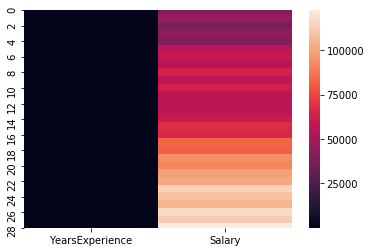

In [9]:
sns.heatmap(salary_data)

there is no null data

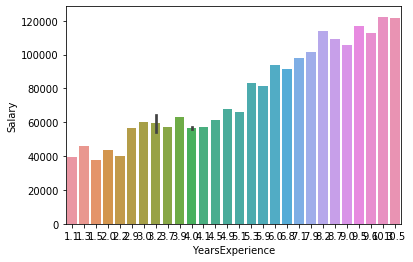

In [10]:
sns.barplot(x='YearsExperience',y='Salary',data=salary_data)


## Data Preprocessing

### Converting features

converting “Salary” from float to int64, using the “astype()” function pandas provides:

In [11]:
salary_data['Salary']=salary_data['Salary'].fillna(0)
salary_data['Salary']=salary_data['Salary'].astype(int)


## Building Machine Learning Model

In [12]:
X=salary_data.iloc[:,:-1]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [13]:
Y=salary_data.iloc[:,-1]
Y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int32

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=22,random_state=43)

In [15]:
X_train.shape

(8, 1)

In [16]:
X_test.shape

(22, 1)

In [17]:
Y_test.shape

(22,)

In [18]:
Y_train.shape


(8,)

### Linear Regression

In [19]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_test)
acc_lm = round(lm.score(X_train, Y_train) * 100, 2)
acc_lm

94.61

In [20]:
print("predicted salary",Y_pred)
print("actual salary",Y_test)

predicted salary [113189.9659306   64129.88859265  65111.09013941  54317.87312506
  56280.27621858  56280.27621858  63148.68704589  91603.5319019
  61186.28395238 127907.98913198  53336.6715783  110246.36129032
 118095.97366439 105340.35355653 102396.74891625  72960.70251348
  37637.44683016  64129.88859265  82772.71798107  44505.85765747
 125945.58603847  69035.89632645]
actual salary 25    105582
12     56957
13     57081
6      60150
7      54445
8      64445
10     63218
20     91738
9      57189
29    121872
5      56642
24    109431
26    116969
23    113812
22    101302
15     67938
1      46205
11     55794
18     81363
3      43525
28    122391
14     61111
Name: Salary, dtype: int32


In [21]:
print('error:')
print('mean absolute error:',mean_absolute_error(Y_test,Y_pred))
print('mean squared error:',mean_squared_error(Y_test,Y_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

error:
mean absolute error: 4522.290304078749
mean squared error: 30119370.721920863
root mean squared error: 5488.111762885379


In [22]:
#r2 score-->coefficient of determination
#is the proportion of the variance in the dependent variabel that is predictable from the independent variable (s)
#i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9567204791571386

# visualizing the training set

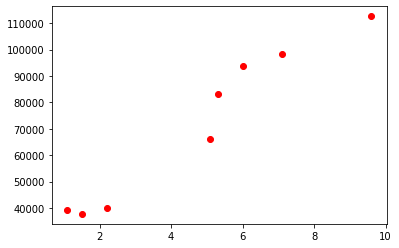

In [23]:
plt.scatter(X_train, Y_train, color ='red')

Next we’ll plot the regression line — which is the predicted values for the X_train

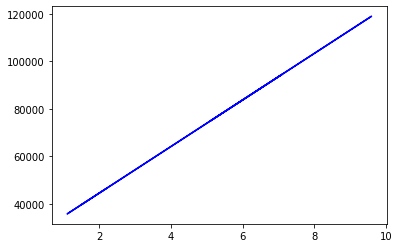

In [24]:
plt.plot(X_train, lm.predict(X_train), color='blue')

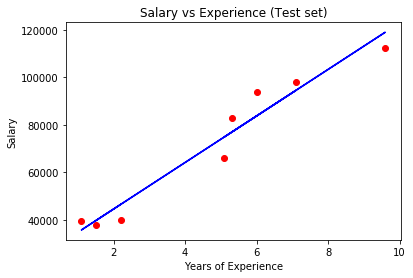

In [25]:
plt.scatter(X_train, Y_train, color ='red')
plt.plot(X_train, lm.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Make_New_Predictions

In [26]:
# Step 7 - Make new prediction
new_salary_pred = lm.predict([[14]])
new_salary_pred

array([162250.04326855])

In [27]:
new_salary_pred = lm.predict([[19]])
new_salary_pred

array([211310.12060649])

## Saving Model

In [28]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lm,'lm.obj')
#load the model from a file
lg_from_joblib=joblib.load('lm.obj')
#use the loaded model to make prediction
lg_from_joblib.predict(X_test)

array([113189.9659306 ,  64129.88859265,  65111.09013941,  54317.87312506,
        56280.27621858,  56280.27621858,  63148.68704589,  91603.5319019 ,
        61186.28395238, 127907.98913198,  53336.6715783 , 110246.36129032,
       118095.97366439, 105340.35355653, 102396.74891625,  72960.70251348,
        37637.44683016,  64129.88859265,  82772.71798107,  44505.85765747,
       125945.58603847,  69035.89632645])